# IMPORT ALL THE NECCESSORY LIBRATRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


To read the given dataset as a dataframe we need to import pandas ,and for visualizations we need matplotlib and seaborn .

# READ THE DATASET

In [2]:
train_loan=pd.read_csv('/content/train_loan.csv')
df=train_loan.copy()

# DISPLAY THE FIRST 5 COLUMNS OF THE DATASET

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Dependents']

,Dependents
0,0
1,1
2,0
3,0
4,0
...,...
609,0
610,3+
611,1
612,2


Here column dependents is object type but it is actually numerical so we need to conver it into numerical type

In [5]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

Here actually numbers are stored as strings ,and there is  3+ with 3,we need to replace this and type convert to numerical type

In [6]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [7]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')


In [8]:
df['Dependents'].dtype

dtype('float64')

Here  I encoded  "Dependent" column from object  column into numerical column

# IDENTIFY THE SHAPE OF THE GIVEN DATASET,NO.OF ROWS AND COLUMNS

In [9]:
df.shape

(614, 13)

The given dataset consists of 614 rows and 13 columns

# IDENTIFY THE COLUMNS IN THE DATA

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Identify the datatype of each column

In [11]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


# SUMMARY OF THE DATASET

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


# STATISTICS OF ALL THE NUMERICAL COLUMNS

In [13]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


# STATISTICS OF CATEGORICAL COLUMN

In [14]:
df.describe(include='object')

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,LP002990,Male,Yes,Graduate,No,Semiurban,Y
freq,1,489,398,480,500,233,422


REMOVE DUPLICATES

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.info()#check the info of data after duplicates removal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


This means there was no duplicates row present.info of df after and before applying duplicate removal step is same .

# MISSING VALUES IN EACH COLUMN

In [17]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


out of the total 13 columns 7 columns have missing values


# MISSING VALUE HANDLING


*  CATEGORICAL COLUMNS ...FILL THE MISSING VALUES WITH MODE
*  NUMERICAL COLUMNS ----FILL WITH MEAN OR MEDIAN BASED ON THE DISTRIBUTION



In [18]:
#IDENTIFY THE CATEGORICAL COLUMNS=> COLUMNS WITH DATATYPE 'object'
cat_cols=df.select_dtypes(include='object').columns


In [19]:
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
#identify the numerical columns==>of dtype='int','float'
num_cols=df.select_dtypes(include=['int','float']).columns

In [21]:
num_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

# DISTRIBUTION OF NUMERICAL COLUMNS

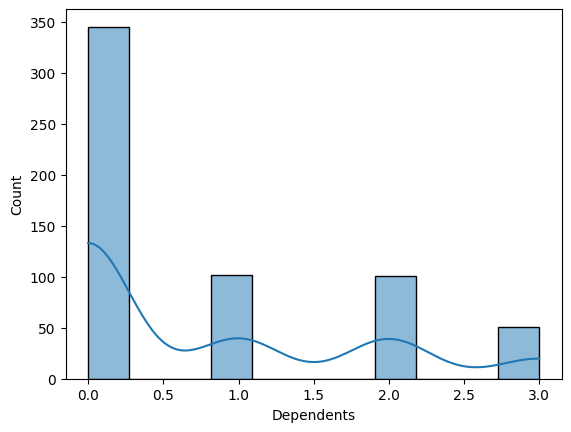

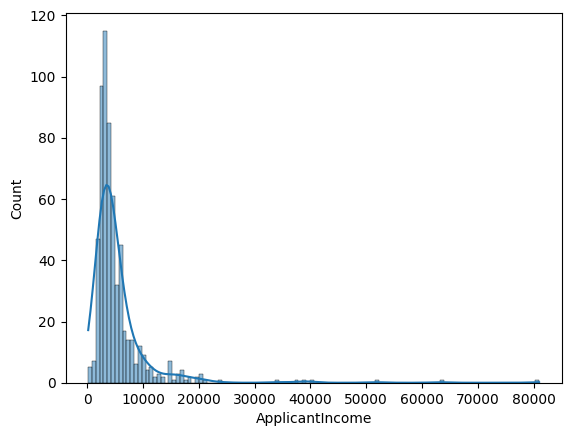

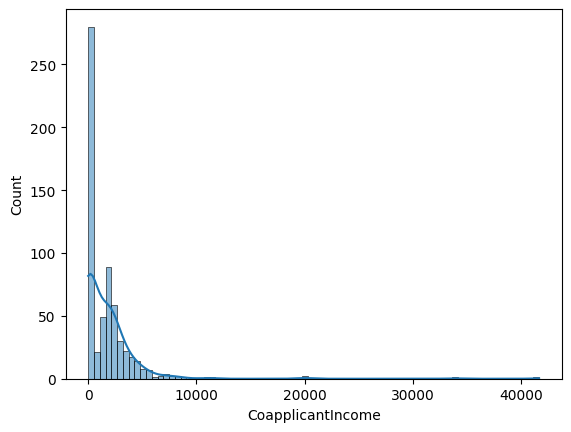

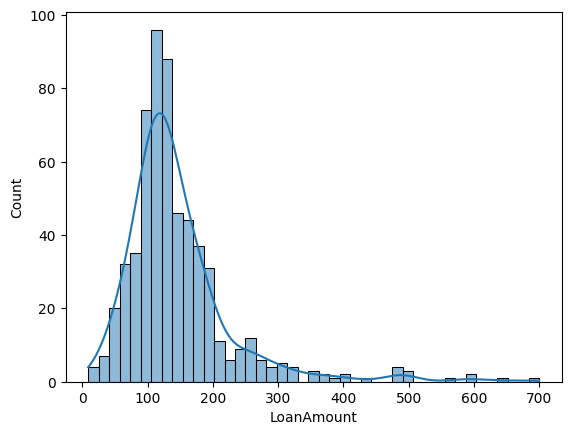

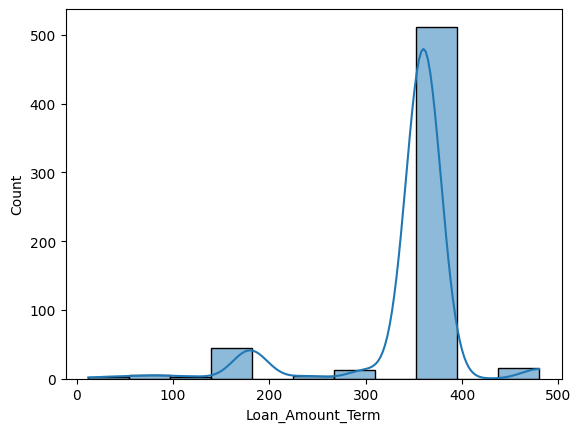

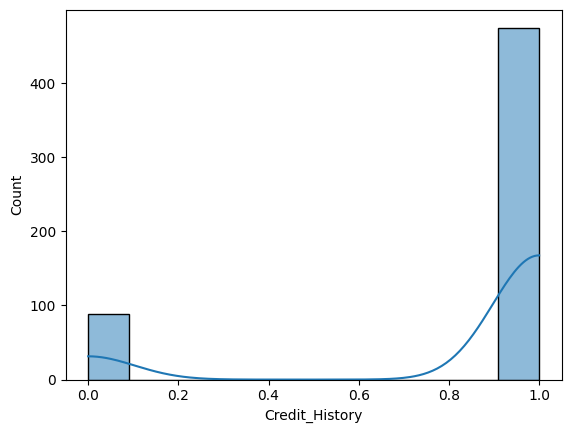

In [22]:
for cols in num_cols:
  sns.histplot(df[cols],kde=True)
  plt.show()

numerical columns here have skwed distribution .hence imputation with median will be good

FIll missing values in numerical columns with median and categorical columns with mode

In [23]:
#df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode()[0])
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [24]:
df[cat_cols].isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Education,0
Self_Employed,0
Property_Area,0
Loan_Status,0


Missing values in cat columns were filled with mode

Fill missing values in numerical columns with median ,median is insensitive to outliers so filling with median will be a better option

In [25]:
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [26]:
df[num_cols].isnull().sum()

,0
Dependents,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [27]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


All the missing values in the datsets are removed

# OUTLIER DETECTION

BOXPLOT ----TO DETECT PRESENCE OF OUTLIERS

In [28]:
# Identify discrete numerical columns
discrete_num_cols = []
for col in num_cols:
    if len(df[col].unique()) < 20:  # Adjust threshold as needed
        discrete_num_cols.append(col)

discrete_num_cols


['Dependents', 'Loan_Amount_Term', 'Credit_History']

In [29]:
#take all contineous numerical columns from num column

cont_num = num_cols.difference(discrete_num_cols) # Use difference to get elements in num_cols but not in discrete_num_cols


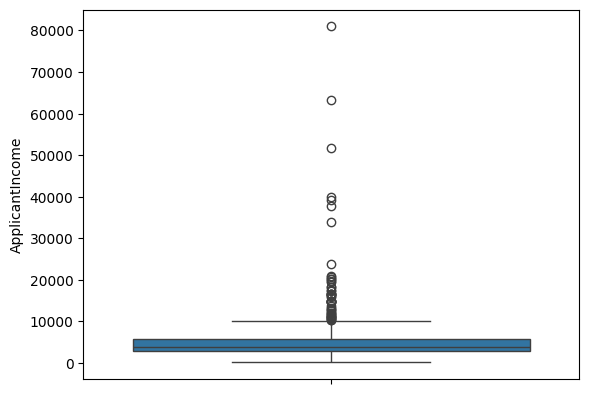

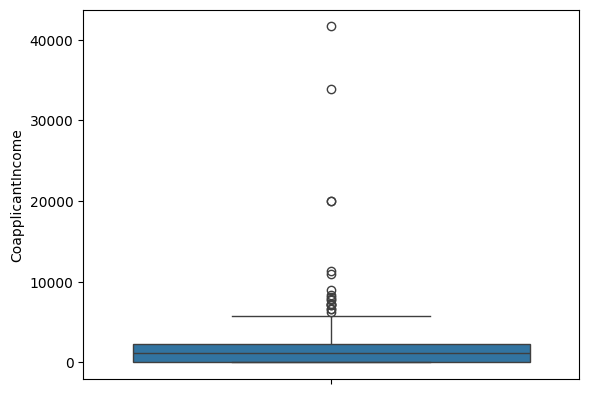

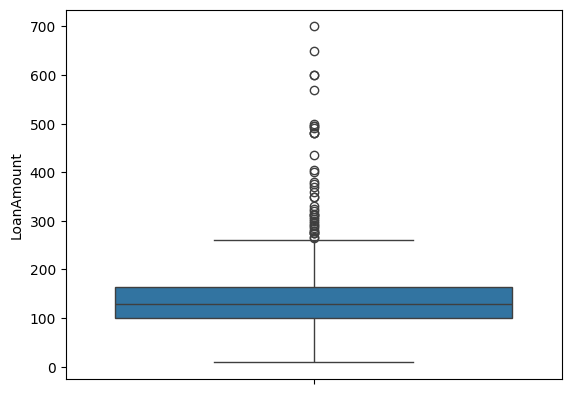

In [30]:
#boxplot of contineous numerical columns
for col in cont_num:
  sns.boxplot(df[col])
  plt.show()

All the contineous numerical columns have outliers present so we need to remove it.I will use IQR based method

EDA

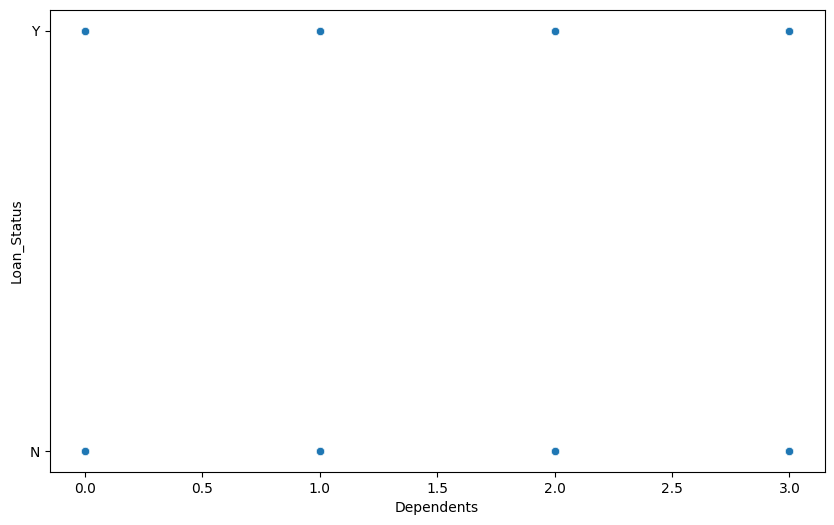

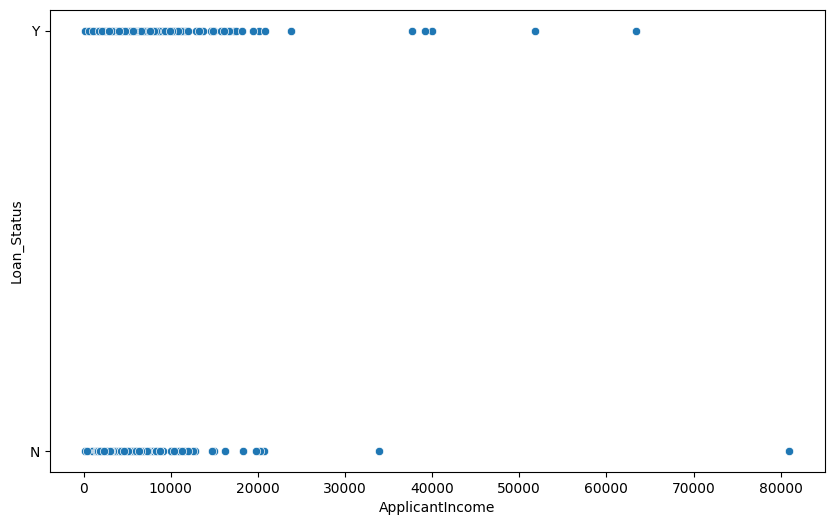

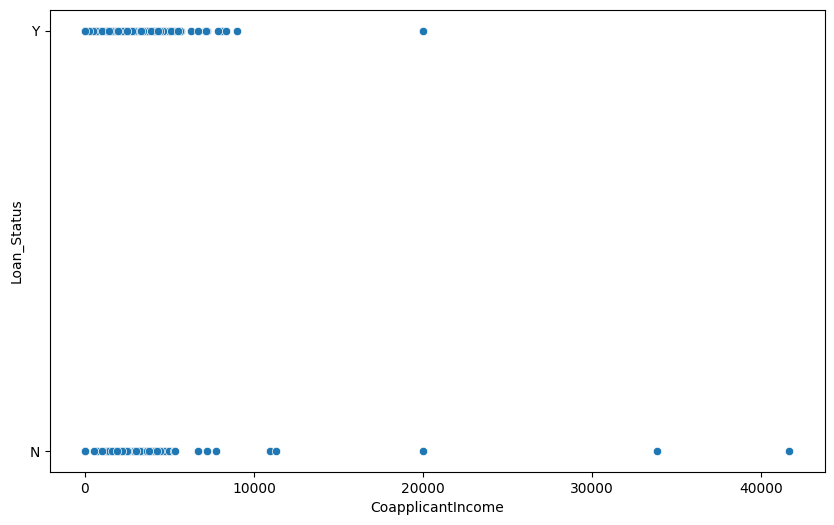

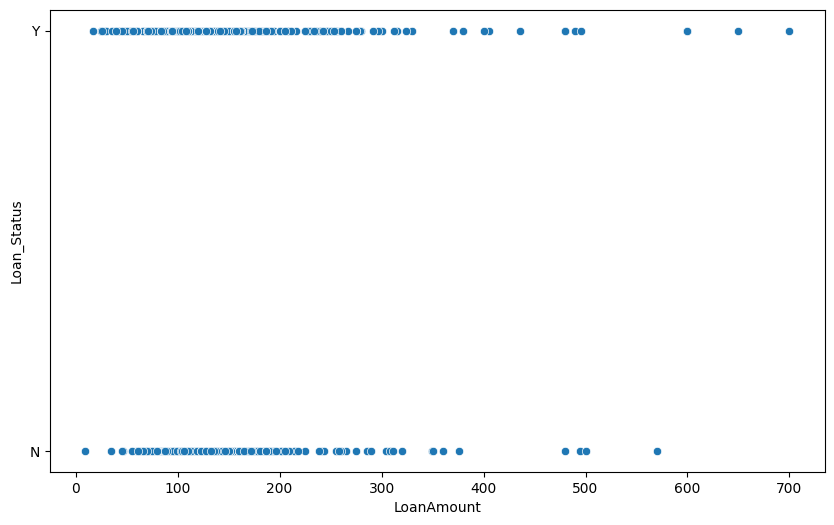

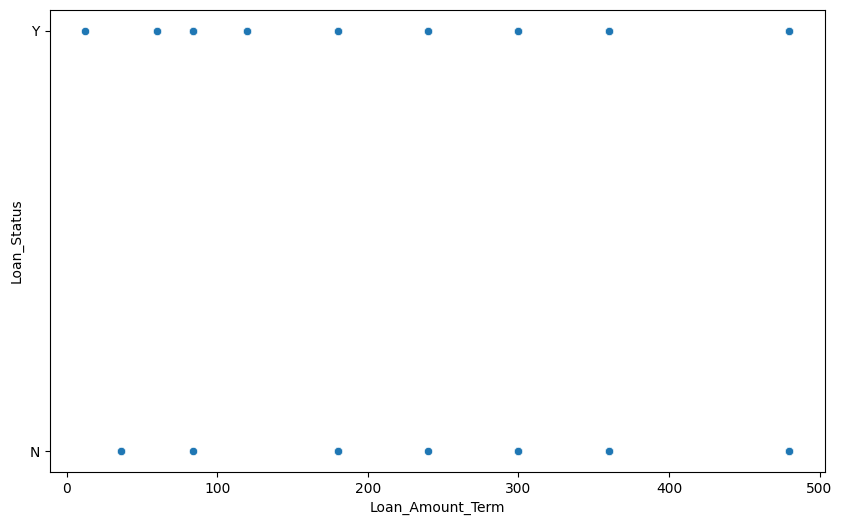

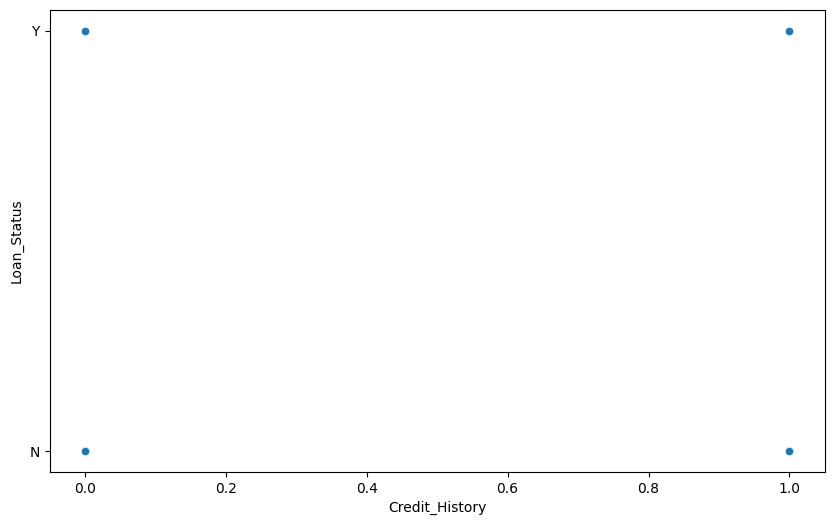

In [31]:
#scatterplot between numerical variables and target ,Target is  Loan_Status
for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=df[col],y=df['Loan_Status'])
  plt.show()

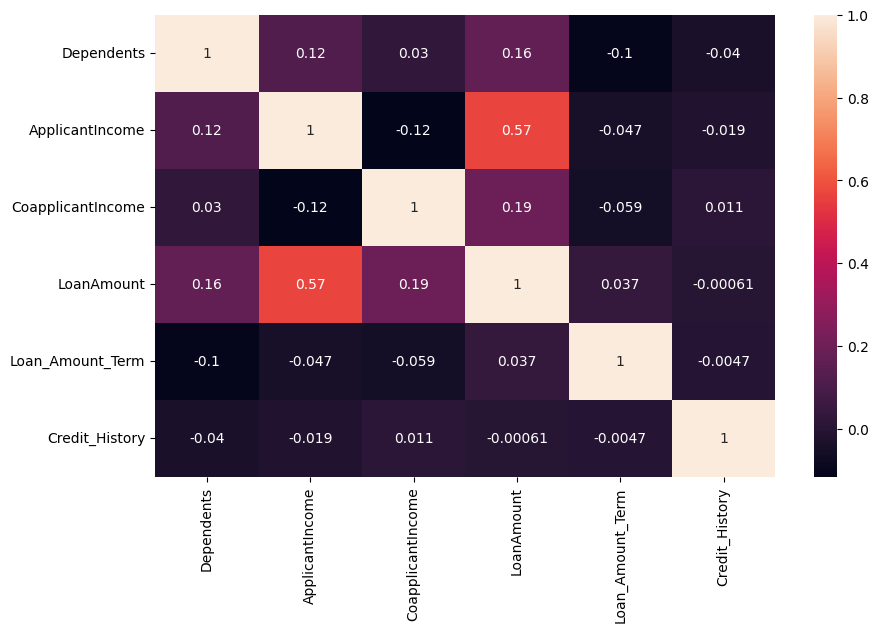

In [32]:
#CORRELATION MATRIX of numerical col
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()


Target

In [33]:
df['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


# ENCODING

Encoding is the process of converting categorical data (text or labels) into a numerical format so that machine learning models can understand and work with them.

Most algorithms only accept numeric input, so encoding is a crucial preprocessing step.

In [34]:
df['Loan_ID'].nunique()

614

Loan_id is just an identifier ,it has no predictive value so we can remove it

In [35]:
df.drop('Loan_ID',axis=1,inplace=True)

In [36]:
cat_cols=cat_cols.drop('Loan_ID')

In [37]:
#identify binary categorical columns
binary_cols=[]
for col in cat_cols:
  if df[col].nunique()==2:
    binary_cols.append(col)

In [38]:
binary_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

#Encode binary categorical columns with label encoder .
Import label encoder from sklearn.preprocessing

Label Encoding assigns a unique integer value to each category in a column.

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in binary_cols:
  df[col]=le.fit_transform(df[col])

# One-hot encode categorical features with more than two unique values

One-hot encoding converts each category into a new column, with 1 indicating presence and 0 for absence.

It is used For nominal (non-ordinal) categorical features with more than two categories

Avoids assigning any implied order between categories

=>identify multiclass columns in the categorical columns

In [40]:
multi_cols=cat_cols.drop(binary_cols)

In [41]:
multi_cols

Index(['Property_Area'], dtype='object')

In [42]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True,dtype=int)


get_dummies is used for one hot encoding ,The drop_first=True parameter avoids multicollinearity by dropping the first category and encoding the rest.

In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


All categorical columns are encoded .

#SCALING

Import  and initialize standard scaler from sklearn

StandardScaler is a preprocessing technique from scikit-learn used to standardize numerical features in a dataset.
It transforms the data in such a way that:

The mean of each feature becomes 0

The standard deviation becomes 1

Many machine learning algorithms (like Logistic Regression, SVM, KNN, and PCA) are sensitive to feature scales.

Standardizing makes training faster and more stable, especially when features vary in units or ranges.



In [44]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [45]:
num_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [46]:
#num_cols=num_cols.drop('Dependents')

In [47]:
num_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [48]:
df[num_cols]=Scaler.fit_transform(df[num_cols])

In [49]:
df[num_cols].head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.737806,0.072991,-0.554487,-0.211241,0.273231,0.411733
1,0.253470,-0.134412,-0.038732,-0.211241,0.273231,0.411733
2,-0.737806,-0.393747,-0.554487,-0.948996,0.273231,0.411733
3,-0.737806,-0.462062,0.251980,-0.306435,0.273231,0.411733
4,-0.737806,0.097728,-0.554487,-0.056551,0.273231,0.411733


In [50]:
df[num_cols].describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,2.893089e-18,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,-1.620130e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-7.378063e-01,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,-2.428760e+00
25%,-7.378063e-01,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,4.117327e-01
50%,-7.378063e-01,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,4.117327e-01
75%,2.534696e-01,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,4.117327e-01
max,2.236021e+00,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,4.117327e-01


Here after applying standard scaler mean become almost zero ans standard deviation 1.

Scaling done correctly

In [51]:
df[num_cols].dtypes

,0
Dependents,float64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,-0.737806,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,0,1
1,1,1,0.253470,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0,0
2,1,1,-0.737806,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,0,1
3,1,1,-0.737806,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,0,1
4,1,0,-0.737806,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,0,1


Check the info of the dataframe after doing all these preprocessing steps

In [53]:
df.reset_index(drop=True, inplace=True)


After the removal of some rows index we need to set .

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    float64
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    float64
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    int64  
 12  Property_Area_Urban      614 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 62.5 KB


All the neccessory preprocessing done.

# DATA SPLITTING

In [55]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [56]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# ENSEMBLE MODELLING

# RANDOMFOREST CLASSIFIER(bagging)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_rfc=rfc.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("ACCURACY SCORE_RANDOMFOREST:",accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

ACCURACY SCORE_RANDOMFOREST: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



# BAGGING CLASSIFIER

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(n_estimators=500)  # Uses DecisionTreeClassifier by default


In [62]:
bagging_model.fit(x_train, y_train)

BaggingClassifier(n_estimators=500)

In [63]:
y_pred_bagging=bagging_model.predict(x_test)

In [64]:

print(accuracy_score(y_test,y_pred_bagging))
print(classification_report(y_test,y_pred_bagging))

0.7642276422764228
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



BAGGING CLASSIFIER USING LOGISTIC REGRESSION AS BASE MODEL

In [65]:
from sklearn.linear_model import LogisticRegression

from sklearn import tree

model = BaggingClassifier(LogisticRegression(),n_estimators=100)

model.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)

In [66]:
model.score(x_test,y_test)

0.7886178861788617

# BOOSTING ENSEMBLE MODELS

# ADABOOST CLASSIFIER

In [67]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(random_state=1)
model_ada.fit(x_train, y_train)
model_ada.score(x_test,y_test)

0.7886178861788617

# GRADIENT BOoSTING CLASSIFIER(GBM)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gbm.fit(x_train, y_train)
model_gbm.score(x_test,y_test)

0.7886178861788617

# XG BOOST

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
model_xgb.score(x_test,y_test)


0.7479674796747967

# CAT BOOST

In [70]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [71]:
from catboost import CatBoostClassifier
cat_model= CatBoostClassifier()
cat_model.fit(x_train, y_train)


Learning rate set to 0.007604
0:	learn: 0.6890364	total: 48.2ms	remaining: 48.2s
1:	learn: 0.6850485	total: 49.4ms	remaining: 24.7s
2:	learn: 0.6807613	total: 50.5ms	remaining: 16.8s
3:	learn: 0.6770812	total: 51.4ms	remaining: 12.8s
4:	learn: 0.6736109	total: 51.8ms	remaining: 10.3s
5:	learn: 0.6697322	total: 53ms	remaining: 8.79s
6:	learn: 0.6658837	total: 54.1ms	remaining: 7.67s
7:	learn: 0.6622076	total: 55.2ms	remaining: 6.85s
8:	learn: 0.6586288	total: 56.4ms	remaining: 6.21s
9:	learn: 0.6548692	total: 57.6ms	remaining: 5.7s
10:	learn: 0.6512751	total: 60ms	remaining: 5.39s
11:	learn: 0.6477075	total: 61.9ms	remaining: 5.09s
12:	learn: 0.6442701	total: 63ms	remaining: 4.79s
13:	learn: 0.6407790	total: 64.3ms	remaining: 4.53s
14:	learn: 0.6370420	total: 66.5ms	remaining: 4.37s
15:	learn: 0.6337948	total: 67.7ms	remaining: 4.16s
16:	learn: 0.6305068	total: 69ms	remaining: 3.99s
17:	learn: 0.6274848	total: 70.1ms	remaining: 3.83s
18:	learn: 0.6241317	total: 71.3ms	remaining: 3.68s
1

In [72]:
cat_model.score(x_test,y_test)

np.float64(0.7804878048780488)

# LIGHT GBM MODEL

In [73]:
  from lightgbm import LGBMClassifier
  lgbm_model = LGBMClassifier()
  lgbm_model.fit(x_train, y_train)


[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [74]:
  lgbm_model.score(x_test,y_test)

0.7560975609756098

AMONG THE BOOSTING ALGORITHMS I GOT BETTER ACCURACY FOR ADABOOST AND GBM CLASSIFIERS.ACCURACY OF .78

# STACKING

**random forest,gradient boosting ,knn are used as base model and logistic regression as meta model**

In [75]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



# Base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Meta-learner
meta_learner = LogisticRegression()

# Stacking classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)#5 fold cross validation

# Fit model
stack_model.fit(x_train, y_train)

# Predict
y_pred = stack_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")


Stacking Model Accuracy: 0.7805


**Stacking decision tree and knn ..random forest classifier  is used as metamodel**

In [76]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



# Base learners
base_learners = [
    ('dt',  DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Meta-learner

meta_learner =RandomForestClassifier(n_estimators=100, random_state=42)
# Stacking classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)#5 fold cross validation

# Fit model
stack_model.fit(x_train, y_train)

# Predict
y_pred = stack_model.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")


Stacking Model Accuracy: 0.7967


**Among the ensemble models I tried ,I got better accuracy for stacking ensemble model with randomforest as metamodel and dt,knn as base model**

# HYPERPARAMETER TUNING FOR STACKING MODEL


# GRIDSEARCH CV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

# Hyperparameter grid

param_grid = {
    'dt__max_depth': [30, 50, 100, None],
    'knn__n_neighbors': [30, 50, 70],
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__max_depth': [5, 10, None]#RANDOM FOREST IS THE FINAL ESTIMATOR OR META MODEL
}


# Grid search
# Use the stack_model_tune and the corrected param_grid
grid = GridSearchCV(estimator=stack_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Use best model to predict
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the best model on the test set
test_accuracy_tuned = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best parameters: {test_accuracy_tuned:.4f}")
print(classification_report(y_test, y_pred))

Best Parameters: {'dt__max_depth': 30, 'final_estimator__max_depth': 5, 'final_estimator__n_estimators': 50, 'knn__n_neighbors': 30}
Best Cross-Validation Accuracy: 0.8044114615543186
Test set accuracy with best parameters: 0.7967
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



# RANDOMSEARCH CV FOR STACKING MODEL

In [78]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=stack_model,param_distributions=param_grid,cv=5,
                         scoring='accuracy',
                         verbose=1,
                         n_jobs=-1,
                         n_iter=18)

In [79]:
random_result=random_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [80]:
print('VALIDATION ,best score:',random_result.best_score_)
print('best params:',random_result.best_params_)

VALIDATION ,best score: 0.8023912595341166
best params: {'knn__n_neighbors': 30, 'final_estimator__n_estimators': 100, 'final_estimator__max_depth': 5, 'dt__max_depth': 100}


In [81]:
#test score after hyperparameter tuning  FOR STAKING MODEL
best_model = random_result.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set score:", test_score)


Test set score: 0.7967479674796748


# HYPERPARAMETER TUNIGN FOR RANDOM FOREST CLASSIFIER

#GRIDSEARCH CV for RF CLASSIFIER

In [82]:
parameters={'max_depth':[10,50,100],
            'criterion':['gini','entropy'],
            'n_estimators':[50,100,200]}

In [83]:
grid_search=GridSearchCV(RandomForestClassifier(),parameters,cv=5,
                         scoring='accuracy',
                         verbose=2,
                         n_jobs=-1)

In [84]:
grid_result=grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [85]:
#cross validation score
print('best params:',grid_result.best_params_)
print('VALIDATION:best score:',grid_result.best_score_)

best params: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
VALIDATION:best score: 0.80439084724799


In [86]:
#test score after hyperparameter tuning
best_model = grid_result.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set score:", test_score)


Test set score: 0.7886178861788617


#RANDOM SEARCH CV FOR RF

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
random_search=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameters,cv=5,
                         scoring='accuracy',
                         verbose=1,
                         n_jobs=-1,
                         n_iter=18)

In [89]:
random_result=random_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [90]:
print('CV best score:',random_result.best_score_)
print('best params:',random_result.best_params_)

CV best score: 0.8044114615543186
best params: {'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'}


In [91]:
#test score after hyperparameter tuning
best_model = random_result.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set score:", test_score)


Test set score: 0.7804878048780488


# HYPERPARAMETER TUNING FOR ADABOOST

In [92]:
#gridsearch

# Hyperparameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1, 1, 2],
    #'algorithm': ['SAMME', 'SAMME.R']
}

# Grid search for AdaBoost
grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(random_state=1), param_grid=param_grid_ada, cv=5,
                         scoring='accuracy',
                         verbose=2,
                         n_jobs=-1)
grid_result_ada = grid_search_ada.fit(x_train, y_train)

# Cross validation score
print('AdaBoost Grid Search best params:', grid_result_ada.best_params_)
print('AdaBoost Grid Search VALIDATION:best score:', grid_result_ada.best_score_)

# Test score after hyperparameter tuning
best_model_ada_grid = grid_result_ada.best_estimator_
test_score_ada_grid = best_model_ada_grid.score(x_test, y_test)
print("AdaBoost Grid Search Test set score:", test_score_ada_grid)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
AdaBoost Grid Search best params: {'learning_rate': 1, 'n_estimators': 50}
AdaBoost Grid Search VALIDATION:best score: 0.8165945165945165
AdaBoost Grid Search Test set score: 0.7886178861788617


In [93]:


# Random search for AdaBoost
random_search_ada = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=1), param_distributions=param_grid_ada, cv=5,
                         scoring='accuracy',
                         verbose=1,
                         n_jobs=-1,
                         n_iter=18)
random_result_ada = random_search_ada.fit(x_train, y_train)

print('AdaBoost Random Search CV best score:', random_result_ada.best_score_)
print('AdaBoost Random Search best params:', random_result_ada.best_params_)

# Test score after hyperparameter tuning
best_model_ada_random = random_result_ada.best_estimator_
test_score_ada_random = best_model_ada_random.score(x_test, y_test)
print("AdaBoost Random Search Test set score:", test_score_ada_random)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
AdaBoost Random Search CV best score: 0.8165945165945165
AdaBoost Random Search best params: {'n_estimators': 50, 'learning_rate': 1}
AdaBoost Random Search Test set score: 0.7886178861788617


BEST MODEL IS STACKING MODEL WITH DT AND KNN AS BASEMODEL AND RANDOM FOREST AS METAMODEL.